### 이미지에서 얼굴 모자이크 처리

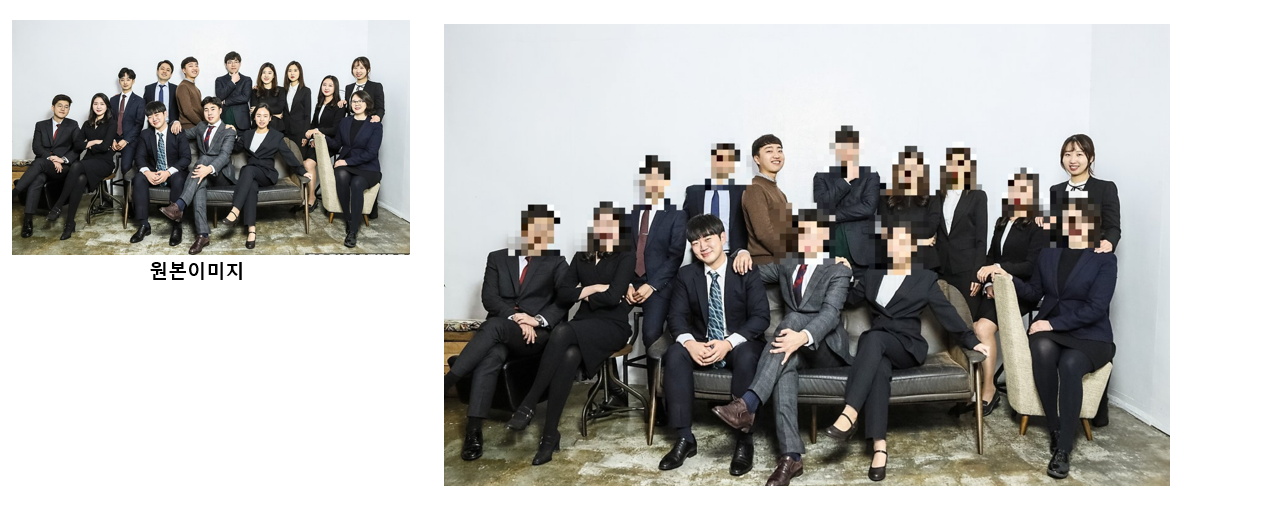

### 참고: https://ponyozzang.tistory.com/598

In [2]:
#오픈CV로 쉽게 얼굴 인식하기 =>https://minimin2.tistory.com/139

import cv2

# haarcascade 불러오기
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# 이미지 불러오기
img = cv2.imread('two.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# 얼굴 찾기
faces = face_cascade.detectMultiScale(gray, 1.3, 5)

#모자이크 처리함수
def mosaic(src, ratio=0.1):
    small = cv2.resize(src, None, fx=ratio, fy=ratio, interpolation=cv2.INTER_NEAREST)
    return cv2.resize(small, src.shape[:2][::-1], interpolation=cv2.INTER_NEAREST)


    
dst=img.copy()
for face in faces:
    x=face[0]
    y=face[1]
    width=face[2]
    height=face[3]
    dst[y-20:y + height+20, x-20:x + width+20] = mosaic(dst[y-20:y + height+20, x-20:x + width+20])

    
cv2.imwrite('./face_mosaic_area.jpg', dst)
mo_img=cv2.imread('./face_mosaic_area.jpg')
cv2.imshow('mosaic', mo_img)
cv2.waitKey(0) 

-1